# Getting started with graphics: Exercises

---
Erasmus Q-Intelligence B.V.

---

Below is a set of exercises. For every question, an empty code cell is provided where you can add your code that serves as an answer to the question. If there are additional questions regarding interpreting what you see, you can do so by adding comments (start with `#`), or adding a *Markdown* cell below or above the *Code* cell, and providing your findings there.

## Exercise 1

Load the patents data from the provided patents.csv file. The data set contains information on patents granted in 2012 in each of the 50 US federal states and the District of Columbia. See the appendix for a description of the variables.

### a
Produce a density plot of **logutility** with separate density estimates for observations corresponding to different population density categories (variable **densitycat**). Use different colors for the different population density categories. Hint: use hue in seaborn

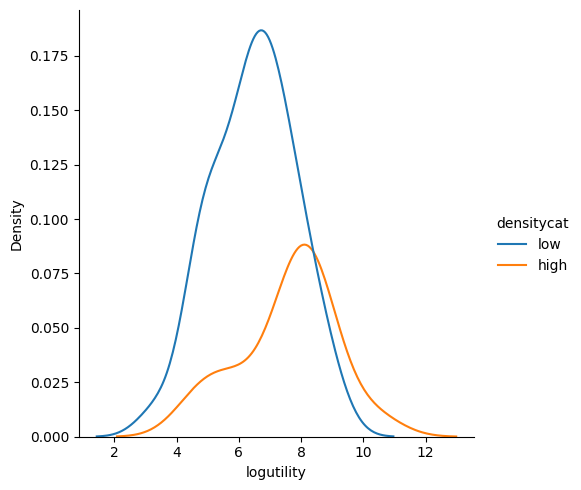

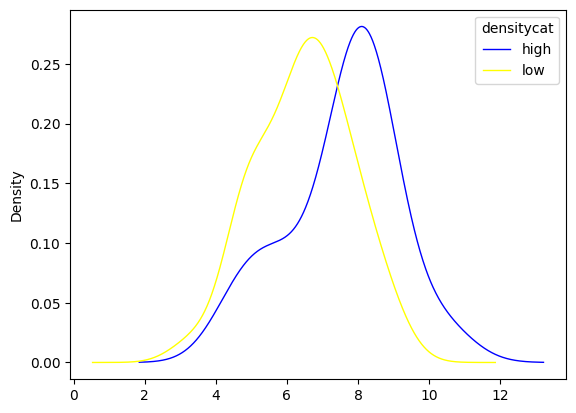

densitycat,high,low
0,NaN,6.025866
1,NaN,3.367296
2,NaN,7.701200
3,NaN,5.187386
4,10.376860,NaN
5,NaN,7.800982
6,7.653969,NaN
7,6.100319,NaN
8,4.882802,NaN
9,8.212568,NaN


In [80]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

patents = pd.read_csv("patents.csv")

# Use hue to create density plot for each status
sns.displot(patents, x = "logutility", hue = "densitycat", kind = "kde")
plt.show()

# If we use pandas, we have to turn the data into a wide format
data_wide = patents.pivot(columns = "densitycat", values = "logutility")

data_wide.plot.density(linewidth = 1, 
                       color = ["blue", "yellow"])

plt.show()

data_wide

### b
Make a density plot of **logtotal**.  Fill the area under the density with the color black and play with different values of transparancy (**alpha**) to obtain a visually appealing graph.

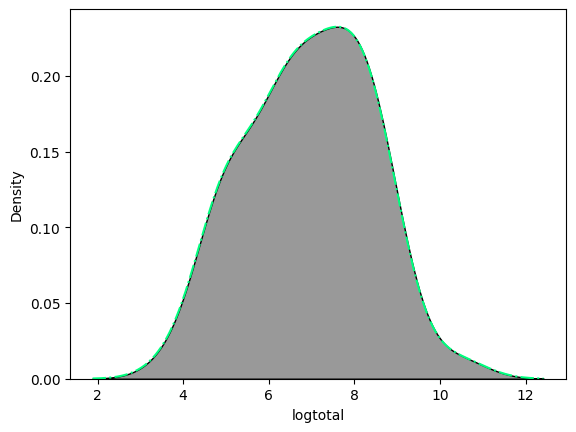

In [81]:
sns.kdeplot(data = patents, x = "logtotal", color = 'black', fill = True, alpha = 0.4)
sns.kdeplot(data = patents, x = 'logtotal', color = 'springgreen', linestyle = "dashdot")
plt.show()

### c
Produce a scatterplot of **logtotal** vs **logplant**. Use plot symbol X and color the points colored according to party affiliation of the governor (variable **areacat**). Also play with the size of the points until you obtain a visually appealing graph.


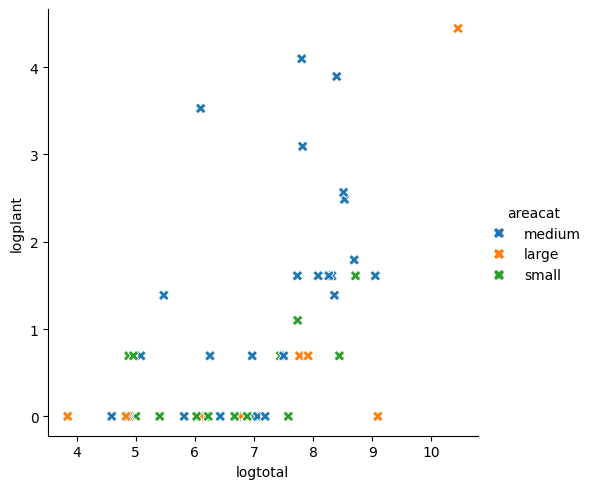

In [82]:
# Turn areacat into a factor such that we can use the colors from it


sns.relplot(data = patents, x = "logtotal", y = "logplant", marker = "X", s = 60, hue = "areacat")
plt.show()

### d
Produce the same scatterplot as in (c), but with plot symbol "H".

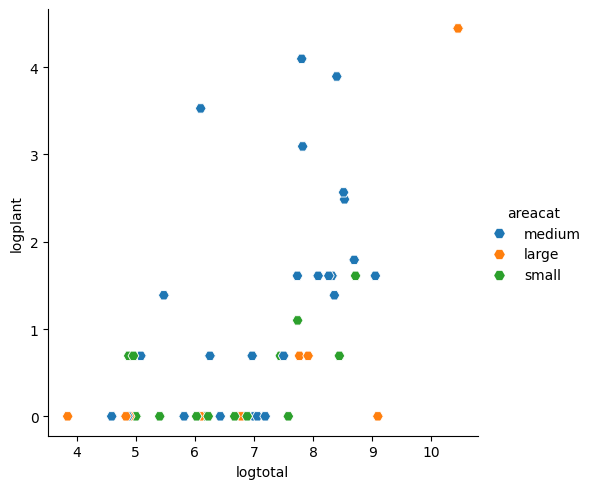

In [83]:
sns.relplot(data = patents, x = "logtotal", y = "logplant", marker = "H", s = 60, hue = "areacat")
plt.show()

### e
Produce conditional boxplots of **logutility** with observations grouped by population density category (variable **densitycat**). 

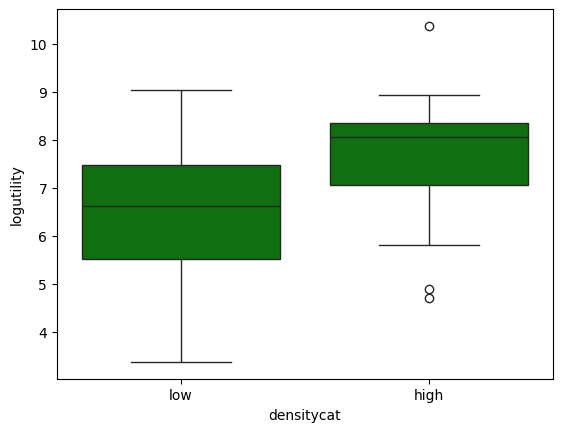

In [84]:
sns.boxplot(data = patents, x = "densitycat", y = "logutility", color = "green")

plt.show()


### f
*Bonus*: Continue with the plot from (e). Change the color and size of the text. 

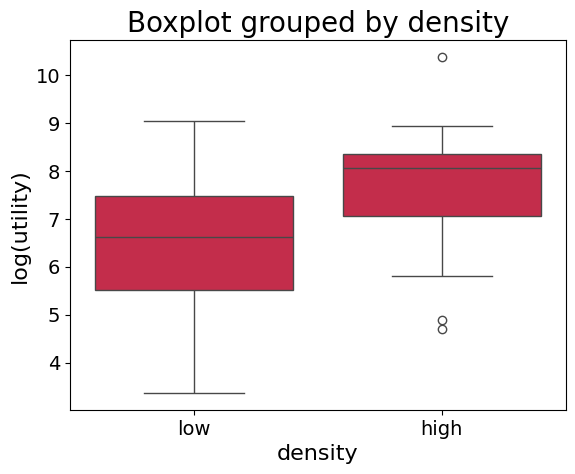

In [85]:
sns.boxplot(data = patents, x = "densitycat", y = "logutility", color = "crimson")
plt.xlabel('density', fontsize=16);
plt.ylabel('log(utility)', fontsize=16);
plt.title('Boxplot grouped by density', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## Exercise 2
Load the **msleep** data from the provided msleep.csv file. Dataset on mammalian sleep.


### a
Produce a scatterplot of **sleep_total** vs **sleep_cycle**.  Use plot symbol s and color the observations according to **vore** with the default color scale.  Set the size of the points to a suitable value.
*Bonus*: Change legend position to the upper right corner

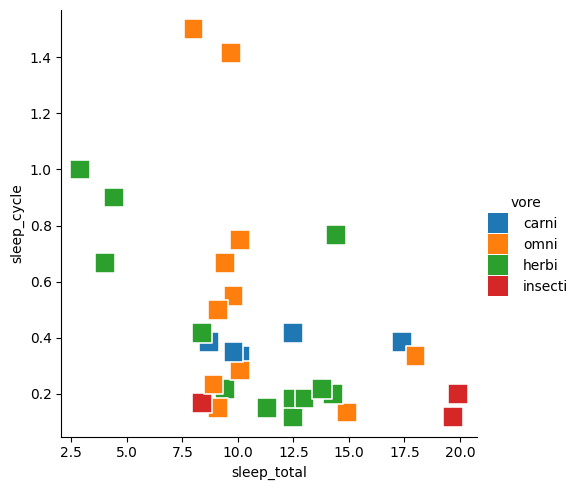

In [86]:
msleep = pd.read_csv("msleep.csv")
sns.relplot(data = msleep, x = "sleep_total", y = "sleep_cycle", hue = "vore", marker = "s", s = 205)

plt.show()

### b
Produce the same scatterplot as in (a), but using a color scale of with four colors of your choice.

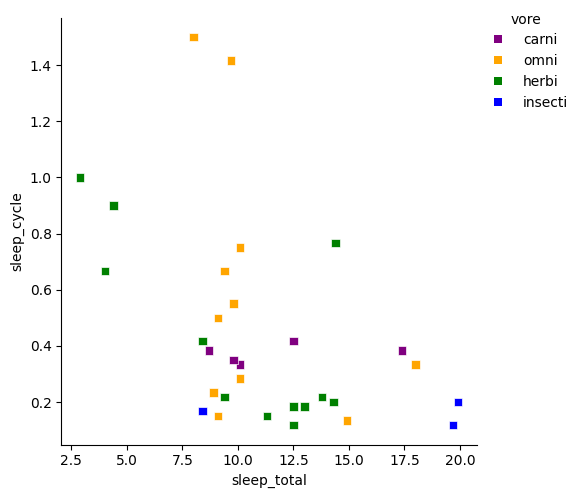

In [87]:
ax = sns.relplot(data = msleep, x = "sleep_total", y = "sleep_cycle", 
                 hue = "vore", marker = "s", palette = ['purple', 'orange', 'green', 'blue'])

sns.move_legend(obj = ax, loc = "upper right")
plt.show()

### c
Categorize the variable **sleep_total** using the following code: 

msleep['sleep_cut'] = pd.cut(msleep['sleep_total'], bins=range(0, 21, 5))

In [88]:
msleep['sleep_cut'] = pd.cut(msleep['sleep_total'], bins=range(0, 21, 5))

### d
Use the new variable from (c) to produce a barplot by putting **vore** on the x-axis and specifying **sleep_cut** as fill color. Make the bars horizontal rather than vertical.

Hint: to create a stacked barchart, make use of the function displot from seaborn.


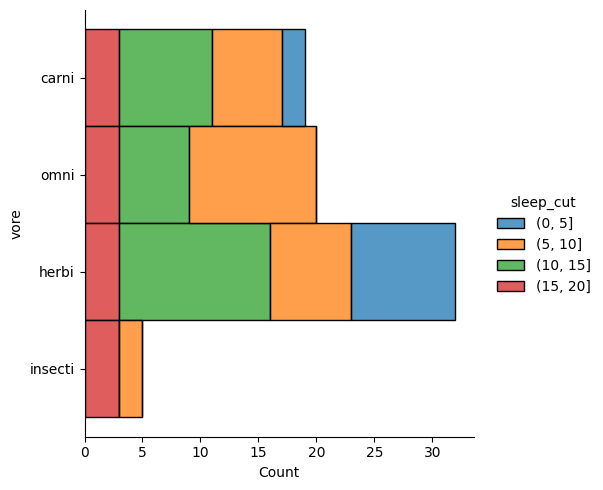

In [110]:
sns.displot(msleep, y = 'vore', hue = 'sleep_cut', multiple = 'stack')
plt.show()

### e
Continue with the plot from (d).  Change the axis labels to Type and Frequency and manually change the colors.
*Bonus*: Change the legend title

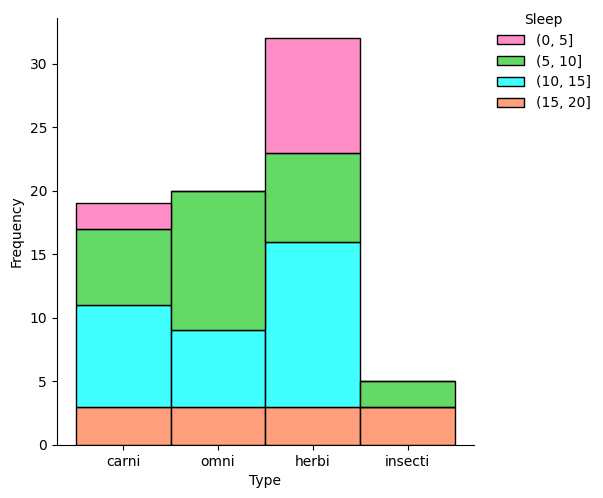

In [90]:
p = sns.displot(msleep, x = 'vore', hue = 'sleep_cut', multiple = 'stack', 
                palette = ["hotpink", "limegreen", "aqua", "coral"])
#GetCurrentAxes
ax = plt.gca()
ax.set_xlabel("Type")
ax.set_ylabel("Frequency")
sns.move_legend(p, title="Sleep", loc = "upper right") 
plt.show()

### f
Produce a similar barplot as in f, but put the bars for different **vore** side-by-side instead of stacking them.

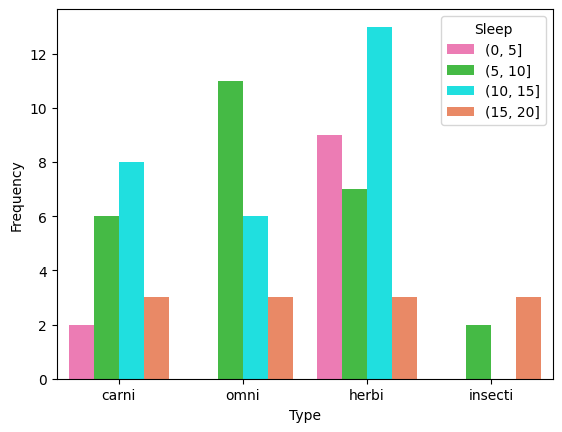

In [91]:
p = sns.countplot(data = msleep, x = "vore", hue = "sleep_cut",
                  palette = ["hotpink", "limegreen", "aqua", "coral"])

ax = plt.gca()
ax.set_xlabel("Type")
ax.set_ylabel("Frequency")
p.legend_.set_title("Sleep")


plt.show()

## Exercise 3
Consider again the *patents* data

### a 
Produce a boxplot of **logdensity** to verify that there are two potential outliers.  Remove the x-axis label and change the y-axis label to 'Logarithm of population density'.

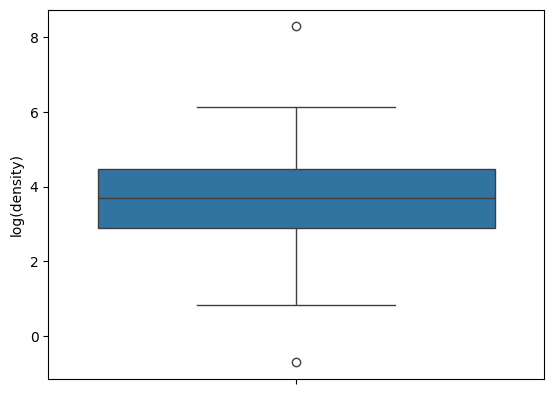

In [92]:
sns.boxplot(data = patents, y = "logdensity")
ax = plt.gca()
ax.set_ylabel("log(density)")
plt.show()

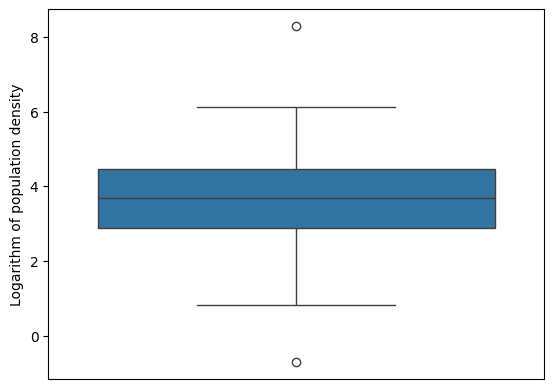

In [93]:
sns.boxplot(data = patents, y = "logdensity")
ax = plt.gca()
ax.set_ylabel("Logarithm of population density")
ax.set_xticks([])
plt.show()

### b 
The cut-off values for outliers according to the boxplot from (a) are 0.5242581 and 6.8220640.  Produce a scatterplot of **logtotal** vs **logdensity**, and add grey reference lines for the cut-off values.

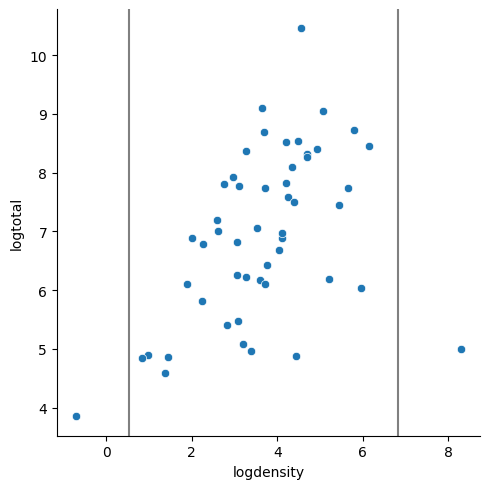

In [113]:
sns.relplot(data = patents, x = "logdensity", y = "logtotal")
# Add vertical lines
plt.axvline(x = 6.8220640, c = "grey") 
plt.axvline(x = 0.5242581, c = "grey")
plt.show()

### c
Refine the plot from (b). Change the axis labels to 'Logarithm of total number of patents' and 'Logarithm of population density', respectively. Furthermore, expand the axis limits (use suitable values of your choice).

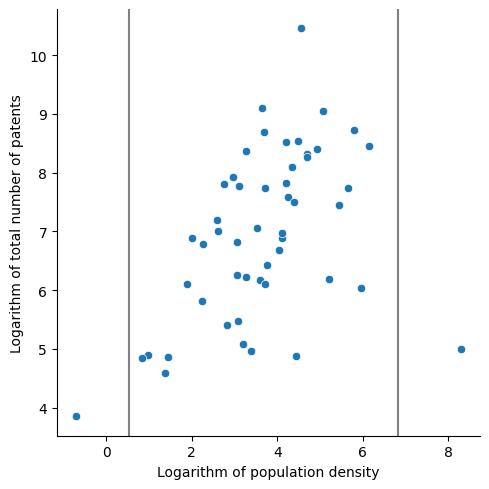

In [95]:
ax = sns.relplot(data = patents, x = "logdensity", y = "logtotal")
# Add vertical lines
plt.axvline(x = 6.8220640, c = "grey") 
plt.axvline(x = 0.5242581, c = "grey")

# Change axis labels
ax = plt.gca()
ax.set_xlabel("Logarithm of population density")
ax.set_ylabel("Logarithm of total number of patents")

plt.show()

### d
Produce a scatterplot of **logtotal** vs **logdensity** and add a linear scatterplot smoother.
*Bonus* Add also confidence intervals.

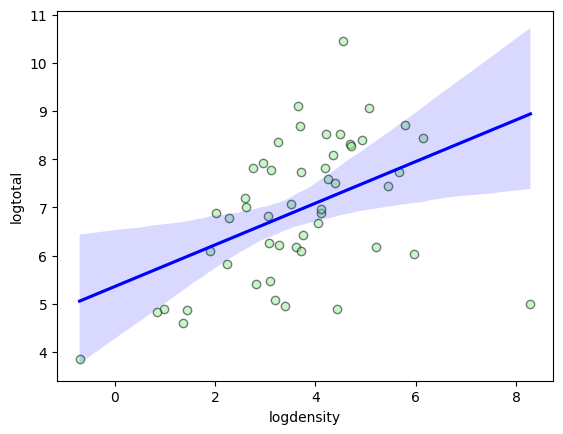

In [112]:
sns.regplot(x = 'logdensity', y = 'logtotal', data = patents, 
            ci = 95, scatter_kws = {"alpha": 0.5, "edgecolors": "black", "color": "lightgreen"},
            line_kws = {"color": "blue"})
plt.show()


### e
Change the color of the scatterplot smoother to a color of your choice.

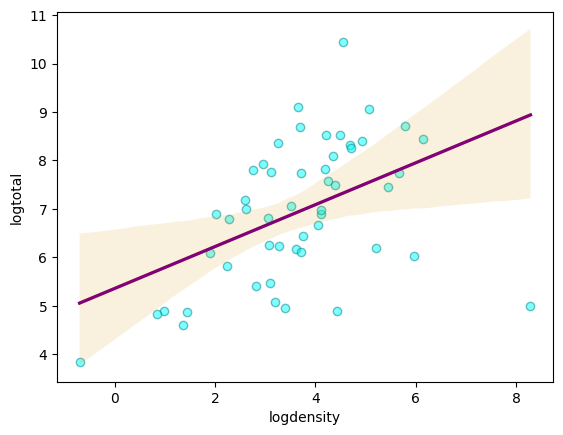

In [97]:
sns.regplot(x = 'logdensity', y = 'logtotal', data = patents, fit_reg = False,
            scatter_kws = {"alpha": 0.5, "edgecolors": "teal", "color": "aqua"})

sns.regplot(data=patents, x='logdensity', y='logtotal', scatter = False, ci = 95, 
    fit_reg = True, color = 'goldenrod') 
sns.regplot(data=patents, x='logdensity', y='logtotal', scatter = False, ci = 0, 
    fit_reg = True, color = 'purple')

plt.show()

## Exercise 4
Consider the vwgolf.csv-dataset from Canvas. It contains information about occasions for sale. Use matplotlib-functions where possible.

### a
Load the data.

In [98]:
vwgolf = pd.read_csv("vwgolf.csv")

### b
Produce a scatterplot with original price on the x-axis and asking price on the y-axis.
Add x and y-labels to the axes.

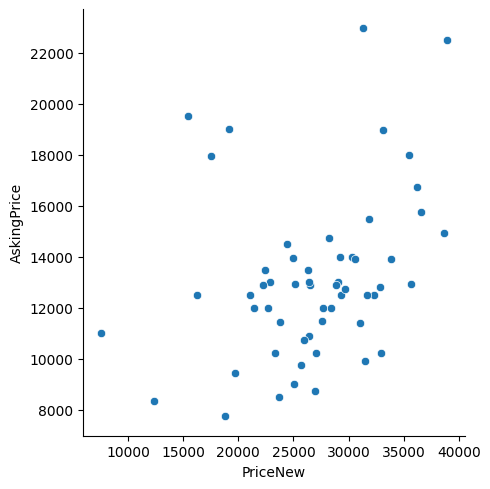

In [99]:
ax = sns.relplot(data = vwgolf, x= "PriceNew", y = "AskingPrice")
plt.xlabel("PriceNew")
plt.ylabel("AskingPrice")
plt.show()

### c
Refine the plot from (b) by letting the color of the points depend on mileage and the size of the points on top speed.

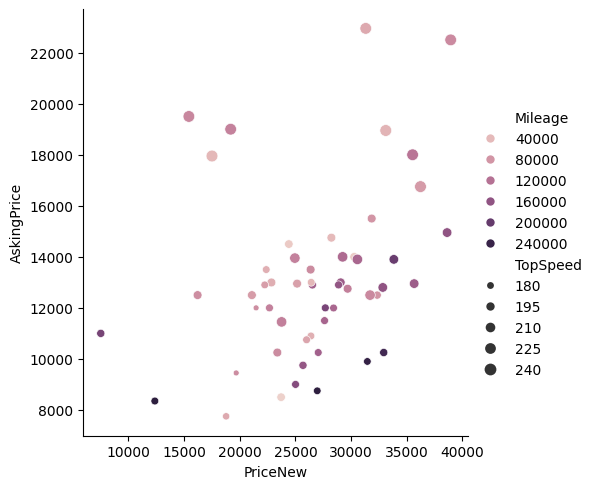

In [100]:
ax = sns.relplot(data = vwgolf, x= "PriceNew", y = "AskingPrice",
                hue = "Mileage", size = "TopSpeed")
plt.xlabel("PriceNew")
plt.ylabel("AskingPrice")
plt.show()

### d
Change the colors in the plot from (c) such that the continuous color scale ranges from white for cars with a low mileage to red for cars with a high mileage.

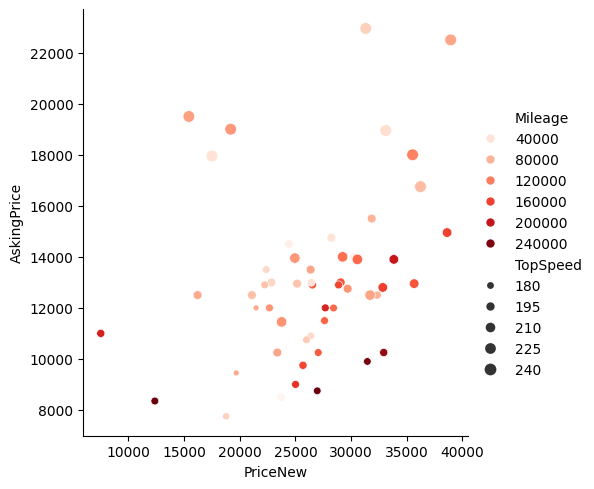

In [114]:
ax = sns.relplot(data = vwgolf, x= "PriceNew", y = "AskingPrice",
                hue = "Mileage", size = "TopSpeed", palette = "Reds")
plt.xlabel("PriceNew")
plt.ylabel("AskingPrice")
plt.show()

### e
Further refine the plot from (c) by changing the axis labels to 'New price (euro)' and 'Asking price (euro)', respectively.

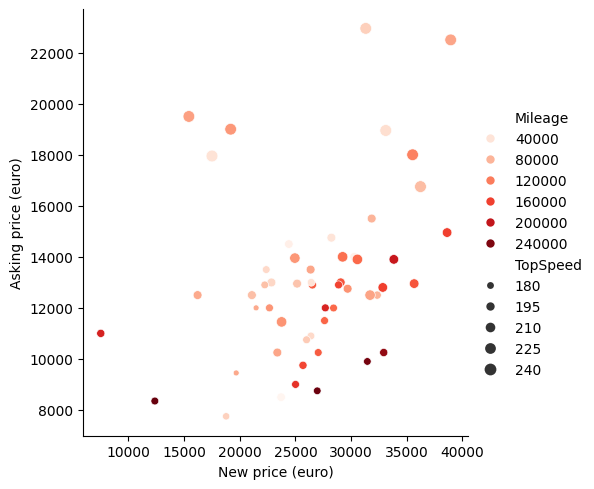

In [102]:
ax = sns.relplot(data = vwgolf, x= "PriceNew", y = "AskingPrice",
                hue = "Mileage", size = "TopSpeed", palette = "Reds")
plt.xlabel("New price (euro)")
plt.ylabel("Asking price (euro)")

plt.show()

### f
Add a plot title and subtitle to the plot from (e). Use Google or another search machine to find how to do this. Use 'Asking Price versus New Price' as plot title, and '56 second-hand VW Golfs from Marktplaats.nl' as subtitle.

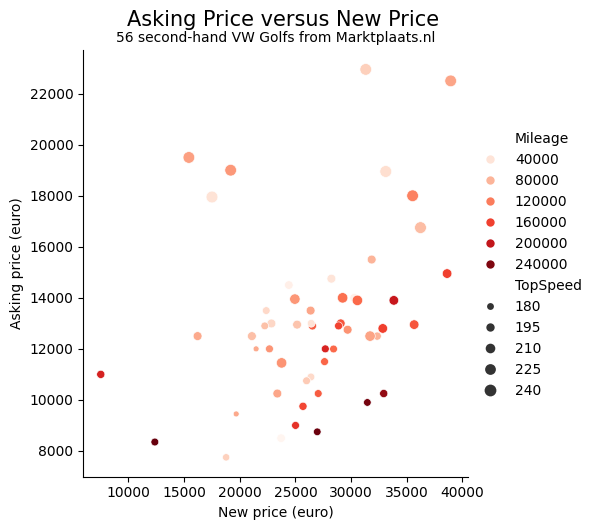

In [103]:
ax = sns.relplot(data = vwgolf, x= "PriceNew", y = "AskingPrice",
                hue = "Mileage", size = "TopSpeed", palette = "Reds")
plt.xlabel("New price (euro)")
plt.ylabel("Asking price (euro)")

# Not intuitive, but we can add a super title and then use title as the subtitle.
plt.suptitle("Asking Price versus New Price", y = 1.05, fontsize=15)
plt.title("56 second-hand VW Golfs from Marktplaats.nl", fontsize=10)

plt.show()